# ASSIGNMENT-7/TEXT CLASSIFICATION

**TEXT CLASSIFICATION :**

Text classification is the process of automatically categorizing or labeling text data into predefined categories or classes based on its content

**IMPORTING PACKAGES AND LOADING DATASET**

In [1]:
#importing pandas
import pandas as pd
# Read data into df
file=r"C:\Users\HP\Downloads\legal_text_classification.csv\legal_text_classification.csv"
df = pd.read_csv(file)   
# Print head
df.head()


,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


**BAR PLOT**

<Axes: xlabel='case_outcome'>

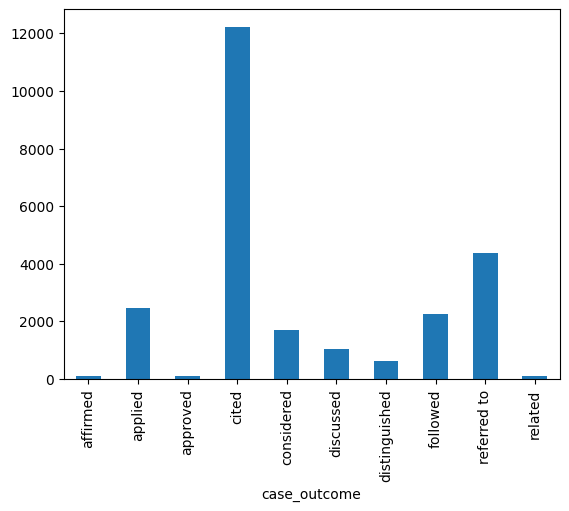

In [2]:
# bar chart
df['case_outcome'].value_counts().sort_index().plot(kind='bar')


**FUNCTION TO REMOVE ODD WORDS**

Odd words refer to words that are uncommon or rare within a given context. These are words that occur infrequently compared to other words in the text.Removing odd words from text data can be beneficial for Noise Reduction,Dimensionality Reduction, Improved Generalization, Enhanced Interpretability.

In [3]:
#importing html and regex
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


**DATA CLEANING**

Data cleaning is the process of preparing and transforming raw data into a clean and structured format suitable for analysis or other downstream tasks. It involves identifying and correcting errors, inconsistencies, and inaccuracies in the data. 

In [4]:
#selecting the 'case_title', 'case_text', and 'case_outcome' columns:
df = df[['case_title','case_text','case_outcome']]
df = df.dropna()
#combining the 'case_title' and 'case_text' columns into a single 'text' column:
df['title'] = df['case_text'] + ' ' + df['case_title']
#dropping the 'case_title' and 'case_text' columns after combining them into 'text'
df = df.drop(columns=['case_title','case_text']) 
df['title'] = df['title'].apply(clean)
df = df[df['title'].str.len() > 50]
df.sample(2)


,case_outcome,title
1093,applied,The position of the NCC is slightly different....
14930,cited,"Under s 556 of the Code, and under the former ..."


**TRAIN TEST AND SPLIT**

In [5]:
#Importing train_test_split from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

#Splitting the 'title' column (features) and the 'case_outcome' column (target) 
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['case_outcome'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['case_outcome'])

#Printing the sizes of the training and testing data
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])


Size of Training Data  19847
Size of Test Data  4962


**TRAINING MODEL USIN SVM**

In [6]:
#importing functions and classes from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
#Creating an instance of TfidfVectorizer with specified parameters
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)


**BUILDING THE MODEL**

In [7]:
#Importing the LinearSVC class from the sklearn.svm module
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

**TESTING AND ACCURACY OF THE MODEL**

In [8]:
#Importing the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))


Accuracy Score -  0.6031841999193873


**DUMMY CLASSIFIER**

A dummy classifier is a simple baseline classifier used in machine learning for comparison purposes.Unlike traditional classifiers, a dummy classifier makes predictions using simple rules that are unrelated to the actual data.

In [9]:
#importing the DummyClassifier class from the sklearn.dummy module
from sklearn.dummy import DummyClassifier
#initializing and Training the Dummy Classifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.48810963321241435


**CONFUSION MATRIX**

In [10]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)


array([[  12,    1,    0,    6,    0,    0,    0,    0,    1,    1],
       [   0,  125,    2,  268,   14,   12,    1,   16,   50,    0],
       [   0,    0,    2,   13,    3,    1,    0,    1,    1,    0],
       [   4,   92,    1, 2045,   42,   20,    8,   63,  146,    1],
       [   1,   22,    1,  153,   97,    6,    2,   17,   41,    0],
       [   0,    7,    0,   85,   13,   57,    2,    7,   33,    0],
       [   0,    9,    1,   51,    7,    6,   27,    4,   16,    0],
       [   0,   29,    1,  200,   20,    7,    6,  138,   48,    1],
       [   1,   28,    0,  290,   22,   15,    2,   30,  485,    0],
       [   1,    3,    0,    9,    0,    1,    0,    1,    2,    5]],
      dtype=int64)

**PLOTTING CONFUSION MATRIX**

A confusion matrix is a table that is often used to evaluate the performance of a classification model. It summarizes the performance of a classification algorithm by displaying the number of correct and incorrect predictions for each class compared to the actual class labels in the dataset.

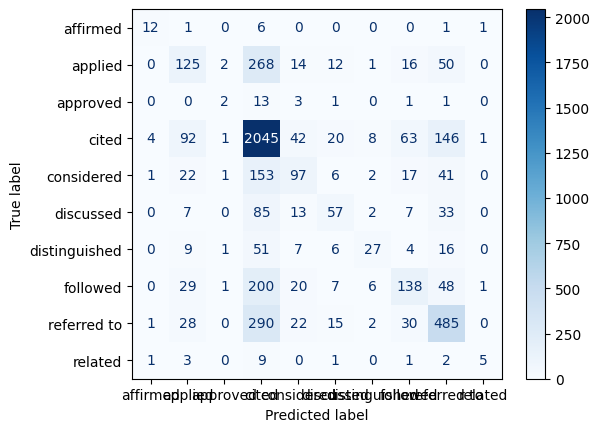

In [11]:
#importing ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted labels
predicted_labels = model1.predict(X_test_tf)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()


**CLASSIFICATION REPORT**

In [12]:
#importing the Classification Report Function
from sklearn.metrics import classification_report
#classification_report function to generate a text report
print(classification_report(Y_test, Y_pred))


               precision    recall  f1-score   support

     affirmed       0.63      0.57      0.60        21
      applied       0.40      0.26      0.31       488
     approved       0.25      0.10      0.14        21
        cited       0.66      0.84      0.74      2422
   considered       0.44      0.29      0.35       340
    discussed       0.46      0.28      0.35       204
distinguished       0.56      0.22      0.32       121
     followed       0.50      0.31      0.38       450
  referred to       0.59      0.56      0.57       873
      related       0.62      0.23      0.33        22

     accuracy                           0.60      4962
    macro avg       0.51      0.36      0.41      4962
 weighted avg       0.58      0.60      0.58      4962



**DOWNSAMPLING**

In [13]:
# Filter bug reports with type case_outcome and sample 4000 rows from it
df_sampleP3 = df[df['case_outcome'] == 'cited'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['case_outcome'] != 'cited']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['case_outcome'].value_counts()


case_outcome
referred to      4363
cited            4000
applied          2438
followed         2252
considered       1699
discussed        1018
distinguished     603
related           112
approved          108
affirmed          106
Name: count, dtype: int64

**REPEATING EVERYTHING**

In [14]:
# Loading the balanced dataframe

df = df_balanced[['title', 'case_outcome']]
df = df.dropna()

# Step 1 - Data Preparation

df['title'] = df['title'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['case_outcome'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['case_outcome'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  13359
Size of Test Data  3340


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score -  0.49730538922155687
               precision    recall  f1-score   support

     affirmed       0.58      0.67      0.62        21
      applied       0.44      0.36      0.40       488
     approved       0.29      0.10      0.14        21
        cited       0.48      0.54      0.51       800
   considered       0.46      0.36      0.41       340
    discussed       0.47      0.37      0.42       204
distinguished       0.53      0.36      0.43       121
     followed       0.47      0.41      0.44       450
  referred to       0.55      0.69      0.61       873
      related       0.54      0.32      0.40        22

     accuracy                           0.50      3340
    macro avg       0.48      0.42      0.44      3340
 weighted avg       0.49      0.50      0.49      3340



**GRID SEARCH, SVM NOT LINEARSVM**

In [15]:
#importing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
# Loading the dataframe
df = pd.read_csv(file)
df = df[['case_title', 'case_text', 'case_outcome']]
df = df.dropna()
df['title'] = df['case_title'] + df['case_text']
df = df.drop(columns=['case_title', 'case_text'])
# Step 1 - Data Preparation
df['title'] = df['title'].apply(clean)
df = df[df['title'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('case_outcome', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['case_outcome'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['case_outcome'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Size of Training Data  3970
Size of Test Data  993
